##### TASK: Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe. Store the Channel column in a separate variable, and then drop the Channel and Region columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components). Print out the explained variance for each principal component.

##### K-Means, but Without All the Supervision
###### Challenge: Use K-Means clustering on the wholesale_customers dataset, and then again on a version of this dataset transformed by PCA.

1. Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.

2. Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe. Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.

3. Scale the data, fit a k-means object to it, and then visualize the data and the clustering.

4. Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

###### Challenge: Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

In [1]:
#######################################
############### Imports ###############
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import metrics
#######################################

#read csv
df = pd.read_csv('wholesale_customers_data.csv')
# store channel col as it's own var
channel = df.Channel

In [2]:
#drop channel and region cols
df = df.drop(columns=['Channel', 'Region'])

In [3]:
df.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
#scale & fit
ss = preprocessing.StandardScaler()
X_ss = ss.fit_transform(df)
print(X_ss.round(3))

[[ 0.053  0.524 -0.041 -0.589 -0.044 -0.066]
 [-0.391  0.544  0.17  -0.27   0.086  0.089]
 [-0.447  0.409 -0.028 -0.138  0.133  2.243]
 ...
 [ 0.2    1.315  2.348 -0.543  2.511  0.121]
 [-0.135 -0.518 -0.603 -0.419 -0.57   0.213]
 [-0.729 -0.556 -0.573 -0.62  -0.505 -0.523]]


In [5]:
#fit & pca
pca = PCA(n_components=6)
X_r = pca.fit_transform(X_ss)
print(pca.explained_variance_)

[2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]


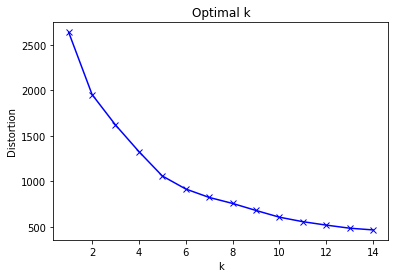

In [6]:
#visual
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
#I didn't know how to do this part, i looked it up
s2d = []
K = range(1,15)
for _ in K:
    km = KMeans(n_clusters=_,
                #verbose=True
                # using verbose reveals decreasing inertia after each itteration. IF kmeans function is meant to reduce inertia between iterations, we can assume the code is correct, or at the minimum is more correct than previous.
               )
    km.fit(X_ss)
    # TODO: Review before final:
    # https://scikit-learn.org/stable/modules/clustering.html
    # The K-means algorithm aims to choose centroids that 'minimise' the inertia, or within-cluster sum-of-squares criterion:
    s2d.append(km.inertia_)

plt.plot(K, s2d, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()


In [7]:
km = KMeans(n_clusters=6)
km.fit(X_ss)
print(km.cluster_centers_)

[[-2.42432596e-01 -3.82879784e-01 -4.36556606e-01 -1.56832496e-01
  -3.97789188e-01 -1.98185086e-01]
 [ 3.88728973e-01  3.94304862e+00  4.02164626e+00  3.57841274e-02
   4.22611641e+00  9.41635735e-01]
 [ 1.68615416e+00 -1.49544583e-01 -2.40881278e-01  7.74225441e-01
  -4.10064716e-01  3.11882714e-01]
 [-5.13818893e-01  6.45602116e-01  8.98264703e-01 -3.40638178e-01
   9.06661102e-01  4.75420634e-02]
 [ 1.96681731e+00  5.17550306e+00  1.28721685e+00  6.90059988e+00
  -5.54861977e-01  1.64784475e+01]
 [ 7.92784210e-01  5.61685048e-01 -1.13014360e-02  9.25255676e+00
  -4.64047057e-01  9.33164138e-01]]


In [8]:
y_km = km.predict(X_ss)
y_km

array([0, 3, 3, 0, 2, 0, 0, 0, 0, 3, 3, 0, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       2, 1, 3, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 2, 3, 3, 2, 2, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 2, 3, 2, 0, 1, 3, 0, 0, 0, 1, 0, 3, 0, 1,
       0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 5, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 3,
       0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       2, 0, 0, 0, 0, 2, 3, 4, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 2, 2, 3,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       3, 3, 3, 2, 3, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

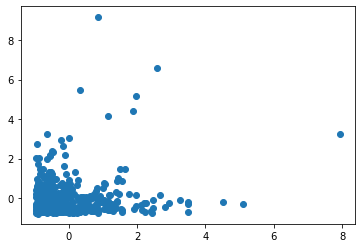

In [9]:
#plt/other visual
plt.scatter(X_ss[:, 0], X_ss[:, 1])


In [10]:
# print(km.cluster_centers_)

In [11]:
#confusion matrix
# y_test =
# y_pred = y_km
# confusion = metrics.confusion_matrix(y_test, y_pred)
# print(confusion)
